# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data preparation and model building
#import *

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
df_train = pd.read_csv('df_train.csv', index_col = 0) # load the data
df_test = pd.read_csv('df_test.csv', index_col = 0)

In [3]:
df_train.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [4]:
df_train.shape

(8763, 48)

In [5]:
df_test.shape

(2920, 47)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2920 entries, 8763 to 11682
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  2920 non-null   object 
 1   Madrid_wind_speed     2920 non-null   float64
 2   Valencia_wind_deg     2920 non-null   object 
 3   Bilbao_rain_1h        2920 non-null   float64
 4   Valencia_wind_speed   2920 non-null   float64
 5   Seville_humidity      2920 non-null   float64
 6   Madrid_humidity       2920 non-null   float64
 7   Bilbao_clouds_all     2920 non-null   float64
 8   Bilbao_wind_speed     2920 non-null   float64
 9   Seville_clouds_all    2920 non-null   float64
 10  Bilbao_wind_deg       2920 non-null   float64
 11  Barcelona_wind_speed  2920 non-null   float64
 12  Barcelona_wind_deg    2920 non-null   float64
 13  Madrid_clouds_all     2920 non-null   float64
 14  Seville_wind_speed    2920 non-null   float64
 15  Barcelona_rain_1h

In [8]:
df_train['time'] = pd.to_datetime(df_train['time'])

In [9]:
df_test['time'] = pd.to_datetime(df_test['time'])

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  8763 non-null   datetime64[ns]
 1   Madrid_wind_speed     8763 non-null   float64       
 2   Valencia_wind_deg     8763 non-null   object        
 3   Bilbao_rain_1h        8763 non-null   float64       
 4   Valencia_wind_speed   8763 non-null   float64       
 5   Seville_humidity      8763 non-null   float64       
 6   Madrid_humidity       8763 non-null   float64       
 7   Bilbao_clouds_all     8763 non-null   float64       
 8   Bilbao_wind_speed     8763 non-null   float64       
 9   Seville_clouds_all    8763 non-null   float64       
 10  Bilbao_wind_deg       8763 non-null   float64       
 11  Barcelona_wind_speed  8763 non-null   float64       
 12  Barcelona_wind_deg    8763 non-null   float64       
 13  Madrid_clouds_all 

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2920 entries, 8763 to 11682
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  2920 non-null   datetime64[ns]
 1   Madrid_wind_speed     2920 non-null   float64       
 2   Valencia_wind_deg     2920 non-null   object        
 3   Bilbao_rain_1h        2920 non-null   float64       
 4   Valencia_wind_speed   2920 non-null   float64       
 5   Seville_humidity      2920 non-null   float64       
 6   Madrid_humidity       2920 non-null   float64       
 7   Bilbao_clouds_all     2920 non-null   float64       
 8   Bilbao_wind_speed     2920 non-null   float64       
 9   Seville_clouds_all    2920 non-null   float64       
 10  Bilbao_wind_deg       2920 non-null   float64       
 11  Barcelona_wind_speed  2920 non-null   float64       
 12  Barcelona_wind_deg    2920 non-null   float64       
 13  Madrid_clouds_

In [12]:
df_train_dummies = pd.get_dummies(df_train)

In [13]:
df_train_dummies.shape

(8763, 81)

In [14]:
df_test_dummies = pd.get_dummies(df_test)

In [15]:
df_test_dummies.shape

(2920, 80)

In [16]:
df_train_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 81 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   time                        8763 non-null   datetime64[ns]
 1   Madrid_wind_speed           8763 non-null   float64       
 2   Bilbao_rain_1h              8763 non-null   float64       
 3   Valencia_wind_speed         8763 non-null   float64       
 4   Seville_humidity            8763 non-null   float64       
 5   Madrid_humidity             8763 non-null   float64       
 6   Bilbao_clouds_all           8763 non-null   float64       
 7   Bilbao_wind_speed           8763 non-null   float64       
 8   Seville_clouds_all          8763 non-null   float64       
 9   Bilbao_wind_deg             8763 non-null   float64       
 10  Barcelona_wind_speed        8763 non-null   float64       
 11  Barcelona_wind_deg          8763 non-null   float64     

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [17]:
# look at data statistics
df_train_dummies.describe().T

,count,mean,std,min,25%,50%,75%,max
Madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,13.0
Bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.0
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,52.0
Seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,100.0
Madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,100.0
...,...,...,...,...,...,...,...,...
Seville_pressure_sp5,8763.0,0.042451,0.201628,0.000000,0.000000,0.000000,0.000000,1.0
Seville_pressure_sp6,8763.0,0.046902,0.211440,0.000000,0.000000,0.000000,0.000000,1.0
Seville_pressure_sp7,8763.0,0.019856,0.139514,0.000000,0.000000,0.000000,0.000000,1.0
Seville_pressure_sp8,8763.0,0.047701,0.213144,0.000000,0.000000,0.000000,0.000000,1.0


In [ ]:
# plot relevant feature interactions

In [18]:
# evaluate correlation
df_train_dummies.corr()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
Madrid_wind_speed,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,...,-0.046371,-0.113807,-0.101987,0.051647,0.050881,0.023339,0.035207,0.012197,0.012842,-0.005568
Bilbao_rain_1h,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,...,0.032486,-0.001711,0.038834,-0.024340,-0.032579,-0.031405,-0.021876,-0.026230,-0.013346,-0.010522
Valencia_wind_speed,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,...,-0.016218,-0.064648,0.021582,0.040077,0.028170,-0.003543,-0.006408,-0.005885,-0.000902,-0.001530
Seville_humidity,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,...,0.066248,0.113068,0.141483,-0.067959,-0.117402,-0.071891,-0.072023,-0.049795,-0.062759,-0.042192
Madrid_humidity,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,...,0.104302,0.174900,0.163829,-0.068738,-0.134485,-0.094930,-0.103408,-0.061511,-0.094460,-0.053552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Seville_pressure_sp5,0.023339,-0.031405,-0.003543,-0.071891,-0.094930,0.006332,0.017468,-0.009201,-0.013194,0.003214,...,-0.042238,-0.046349,-0.046648,-0.040254,-0.046289,1.000000,-0.046708,-0.029969,-0.047124,-0.030750
Seville_pressure_sp6,0.035207,-0.021876,-0.006408,-0.072023,-0.103408,0.010356,-0.010343,-0.026161,-0.011238,0.006995,...,-0.044501,-0.048832,-0.049147,-0.042411,-0.048768,-0.046708,1.000000,-0.031574,-0.049648,-0.032397
Seville_pressure_sp7,0.012197,-0.026230,-0.005885,-0.049795,-0.061511,0.000495,-0.013488,-0.022930,-0.021853,-0.005538,...,-0.028552,-0.031331,-0.031534,-0.027211,-0.031291,-0.029969,-0.031574,1.000000,-0.031855,-0.020787
Seville_pressure_sp8,0.012842,-0.013346,-0.000902,-0.062759,-0.094460,0.038058,-0.006562,-0.017886,-0.028447,0.007011,...,-0.044897,-0.049266,-0.049584,-0.042788,-0.049203,-0.047124,-0.049648,-0.031855,1.000000,-0.032686


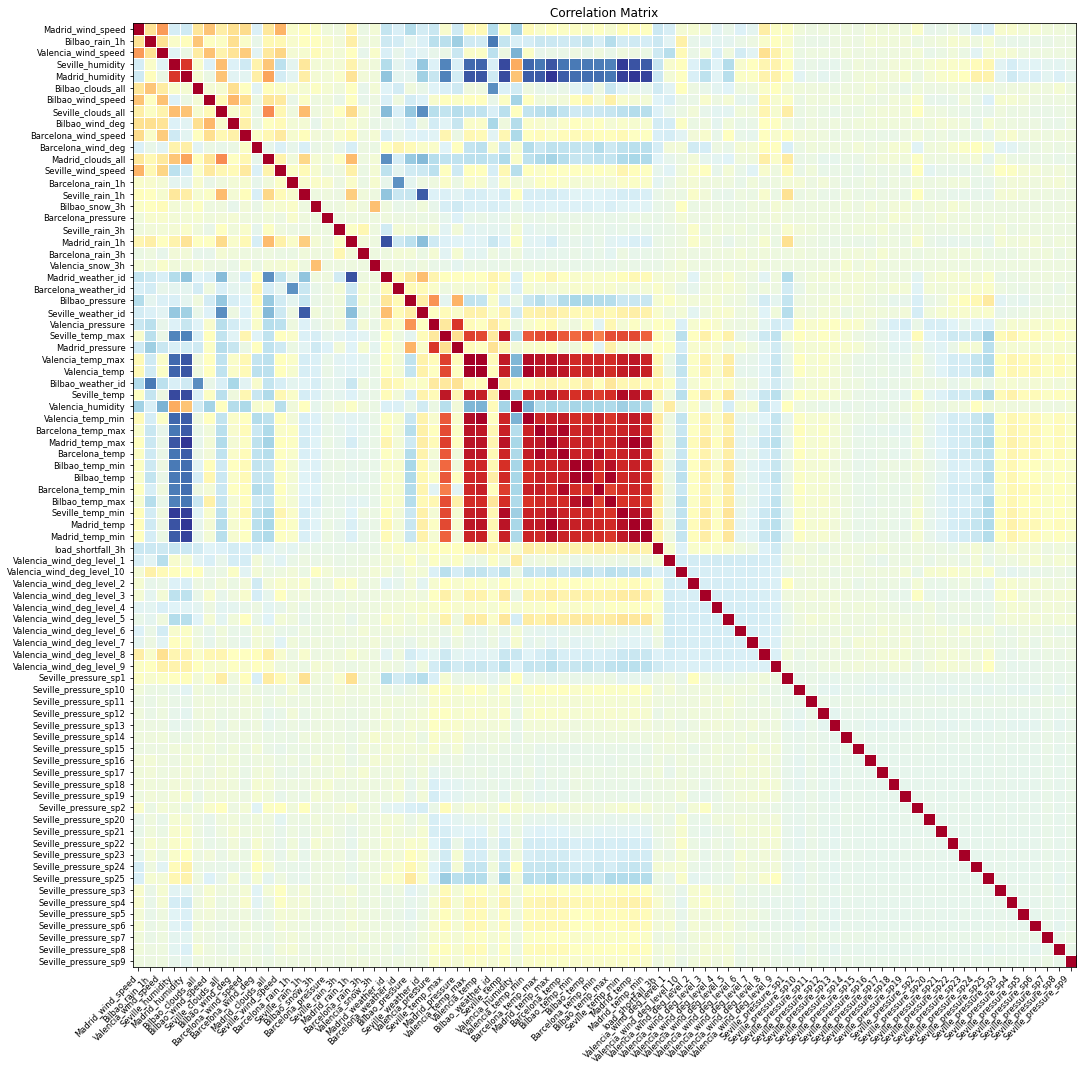

In [19]:
# have a look at feature distributions
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df_train_dummies.corr(), xnames = df_train_dummies.corr().columns, ax = ax);

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [20]:
# remove missing values/ features
df_train_dummies = df_train_dummies.drop(['Valencia_pressure','Madrid_temp_min','Seville_temp_min','Bilbao_temp_max','Barcelona_temp_min','Bilbao_temp_min','Madrid_temp_max','Barcelona_temp_max','Valencia_temp_min','Valencia_temp_max','Seville_temp_max'], axis = 1)

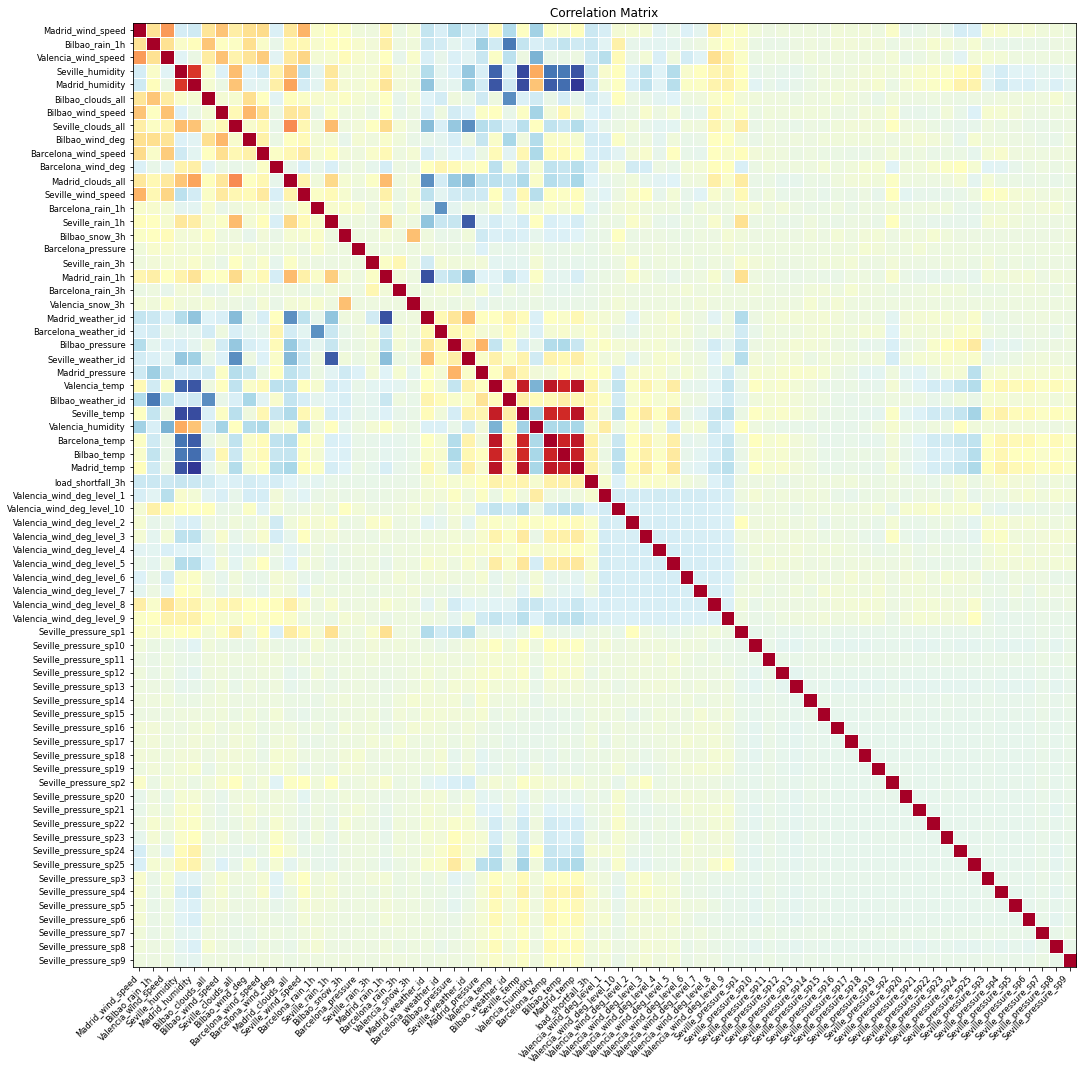

In [46]:
# have a look at feature distributions
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df_train_dummies.corr(), xnames = df_train_dummies.corr().columns, ax = ax);

In [27]:
# remove missing values/ features
df_test_dummies = df_test_dummies.drop(['Valencia_pressure','Madrid_temp_min','Seville_temp_min','Bilbao_temp_max','Barcelona_temp_min','Bilbao_temp_min','Madrid_temp_max','Barcelona_temp_max','Valencia_temp_min','Valencia_temp_max','Seville_temp_max'], axis = 1)

In [28]:
df_test_dummies_time = df_test_dummies['time']

In [33]:
df_test_dummies_time.shape

(2920,)

In [36]:
df_test_dummies_ready = df_test_dummies.drop(['time'], axis =1)

In [21]:
df_train_dummies.head()

,time,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
0,2015-01-01 03:00:00,0.666667,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,0,0,1,0,0,0,0,0,0,0
1,2015-01-01 06:00:00,0.333333,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,0,0,1,0,0,0,0,0,0,0
2,2015-01-01 09:00:00,1.000000,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,0,0,1,0,0,0,0,0,0,0
3,2015-01-01 12:00:00,1.000000,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,0,0,1,0,0,0,0,0,0,0
4,2015-01-01 15:00:00,1.000000,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# create new features

In [ ]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

In [24]:
from statsmodels.formula.api import ols

# Model DataFrame with all of the columns:
dfm = df_train_dummies.copy()

# The dependent variable:
y_name = 'load_shortfall_3h'
# The independent variable
# (let's first try all of the columns in the model DataFrame)
X_names = [col for col in dfm.columns if col != y_name and col != 'time']

# Build the OLS formula string " y ~ X "
formula_str = y_name+" ~ "+" + ".join(X_names);
print('Formula:\n\t {}'.format(formula_str))

Formula:
	 load_shortfall_3h ~ Madrid_wind_speed + Bilbao_rain_1h + Valencia_wind_speed + Seville_humidity + Madrid_humidity + Bilbao_clouds_all + Bilbao_wind_speed + Seville_clouds_all + Bilbao_wind_deg + Barcelona_wind_speed + Barcelona_wind_deg + Madrid_clouds_all + Seville_wind_speed + Barcelona_rain_1h + Seville_rain_1h + Bilbao_snow_3h + Barcelona_pressure + Seville_rain_3h + Madrid_rain_1h + Barcelona_rain_3h + Valencia_snow_3h + Madrid_weather_id + Barcelona_weather_id + Bilbao_pressure + Seville_weather_id + Madrid_pressure + Valencia_temp + Bilbao_weather_id + Seville_temp + Valencia_humidity + Barcelona_temp + Bilbao_temp + Madrid_temp + Valencia_wind_deg_level_1 + Valencia_wind_deg_level_10 + Valencia_wind_deg_level_2 + Valencia_wind_deg_level_3 + Valencia_wind_deg_level_4 + Valencia_wind_deg_level_5 + Valencia_wind_deg_level_6 + Valencia_wind_deg_level_7 + Valencia_wind_deg_level_8 + Valencia_wind_deg_level_9 + Seville_pressure_sp1 + Seville_pressure_sp10 + Seville_pressur

In [25]:
# Fit the model using the model dataframe
model = ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Output the fitted summary
#print(fitted.summary())

In [26]:
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     20.55
Date:                Sat, 19 Feb 2022   Prob (F-statistic):          3.79e-221
Time:                        17:18:28   Log-Likelihood:                -86809.
No. Observations:                8763   AIC:                         1.738e+05
Df Residuals:                    8696   BIC:                         1.742e+05
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [38]:
predict_results = fitted.predict(df_test_dummies_ready)

In [39]:
print(predict_results)

8763      9934.560814
8764      9316.273317
8765     10066.603906
8766     10645.483755
8767      9999.349975
             ...     
11678     9290.620684
11679    12263.539966
11680    13214.027044
11681    12713.315863
11682    10378.144961
Length: 2920, dtype: float64


In [40]:
sub_predict = {'time' : df_test_dummies_time, 'load_shortfall_3h': predict_results}

In [41]:
df_final = pd.DataFrame.from_dict(sub_predict)

In [43]:
df_final.shape

(2920, 2)

In [45]:
df_final.to_csv('file1.csv', index=False)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic